# Table of Content

- [1 Import-Package](#1-Import-Package)
- [2 Data-Preprocessing](#2-Data-Preprocessing)
    - [2.1 Load-Dataset](#2.1-Load-Dataset)
    - [2.2 Split Dataset into Feature and Class](#2.2-Split-Dataset-into-Feature-and-Class)
    - [2.3 Time Series Data (Dataset 1)](#2.3-Time-Series-Data-(Dataset-1))
    - [2.4 Time Series Data (Dataset 2)](#2.4-Time-Series-Data-(Dataset-2))
    - [2.5 Time Series Data (Normalized) (Dataset 1)](#2.5-Time-Series-Data-(Normalized)-(Dataset-1))
    - [2.6 Time Series Data (Normalized) (Dataset 2)](#2.6-Time-Series-Data-(Normalized)-(Dataset-2))
    - [2.7 Wavelet Decomposition (Dataset 1)](#2.7-Wavelet-Decomposition-(Dataset-1))
    - [2.8 Wavelet Decomposition (Dataset 2)](#2.8-Wavelet-Decomposition-(Dataset-2))
    - [2.9 Histogram Data for Each Label (Dataset 1)](#2.9-Histogram-Data-for-Each-Label-(Dataset-1))
    - [2.10 Histogram Data for Each Label (Dataset 2)](#2.10-Histogram-Data-for-Each-Label-(Dataset-2))
    - [2.11 Histogram Data (Dataset 1)](#2.11-Histogram-Data-(Dataset-1))
    - [2.12 Histogram Data (Dataset 2)](#2.12-Histogram-Data-(Dataset-2))
    - [2.13 Histogram Data (Normalized) (Dataset 1)](#2.13-Histogram-Data-(Normalized)-(Dataset-1))
    - [2.14 Histogram Data (Normalized) (Dataset 2)](#2.14-Histogram-Data-(Normalized)-(Dataset-2))
- [3 Experiment](#3-Experiment)
    - [3.1 Split Dataset into Train and Test](#3.1-Split-Dataset-into-Train-and-Test)
    - [3.2 Logistic Regression](#3.2-Logistic-Regression)
    - [3.3 Logistic Regression in Scikit-Learn](#3.3-Logistic-Regression-in-Scikit-Learn)
    - [3.4 Neural Network in PyTorch](#3.4-Neural-Network-in-PyTorch)
    - [3.5 Neural Network in Scikit-Learn](#3.5-Neural-Network-in-Scikit-Learn)

# 1 Import Package

```
conda install autograd # numpy
conda install matplotlib
conda install pandas
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install pywavelets
```

In [23]:
import time

import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt
import torch

from autograd import grad
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neural_network import MLPClassifier
from torch import nn

# 2 Data Preprocessing
- [2.1 Load-Dataset](#2.1-Load-Dataset)
- [2.2 Split Dataset into Feature and Class](#2.2-Split-Dataset-into-Feature-and-Class)
- [2.3 Time Series Data (Dataset 1)](#2.3-Time-Series-Data-(Dataset-1))
- [2.4 Time Series Data (Dataset 2)](#2.4-Time-Series-Data-(Dataset-2))
- [2.5 Time Series Data (Normalized) (Dataset 1)](#2.5-Time-Series-Data-(Normalized)-(Dataset-1))
- [2.6 Time Series Data (Normalized) (Dataset 2)](#2.6-Time-Series-Data-(Normalized)-(Dataset-2))
- [2.7 Wavelet Decomposition (Dataset 1)](#2.7-Wavelet-Decomposition-(Dataset-1))
- [2.8 Wavelet Decomposition (Dataset 2)](#2.8-Wavelet-Decomposition-(Dataset-2))
- [2.9 Histogram Data for Each Label (Dataset 1)](#2.9-Histogram-Data-for-Each-Label-(Dataset-1))
- [2.10 Histogram Data for Each Label (Dataset 2)](#2.10-Histogram-Data-for-Each-Label-(Dataset-2))
- [2.11 Histogram Data (Dataset 1)](#2.11-Histogram-Data-(Dataset-1))
- [2.12 Histogram Data (Dataset 2)](#2.12-Histogram-Data-(Dataset-2))
- [2.13 Histogram Data (Normalized) (Dataset 1)](#2.13-Histogram-Data-(Normalized)-(Dataset-1))
- [2.14 Histogram Data (Normalized) (Dataset 2)](#2.14-Histogram-Data-(Normalized)-(Dataset-2))

## 2.1 Load Dataset

In [24]:
# Load Dataset
dataset_1_path = "Data/pressure_data.xls"
dataset_1_df   = pd.read_excel(dataset_1_path, header=None)
dataset_1      = np.asarray(dataset_1_df)

dataset_2_path = "Data/pressure_data_raw.xls"
dataset_2_df   = pd.read_excel(dataset_2_path, header=None)
dataset_2      = np.asarray(dataset_2_df)

## 2.2 Split Dataset into Feature and Class

In [25]:
# Split Dataset into Features and Class
x_1_raw = dataset_1[:,1:] # chamber pressure data in an interval of time
y_1_raw = dataset_1[:,0]  # chamber quality  data

x_2_raw = dataset_2[:,1:] # chamber pressure data in an interval of time
y_2_raw = dataset_2[:,0]  # chamber quality  data

print("dataset 1")
print("\tchamber pressure data shape: ", x_1_raw.shape)
print("\tchamber quality  data shape: ", y_1_raw.shape)
print("\tx_1_raw.shape= %-10s, x_1_raw.max= %5.2f, x_1_raw.min= %5.2f" % (x_1_raw.shape, np.max(x_1_raw), np.min(x_1_raw)))
print("\ty_1_raw.shape= %-10s, y_1_raw.max= %5.2f, y_1_raw.min= %5.2f" % (y_1_raw.shape, np.max(y_1_raw), np.min(y_1_raw)))
print()
print("dataset 2")
print("\tchamber pressure data shape: ", x_2_raw.shape)
print("\tchamber quality  data shape: ", y_2_raw.shape)
print("\tx_2_raw.shape= %-10s, x_2_raw.max= %5.2f, x_2_raw.min= %5.2f" % (x_2_raw.shape, np.max(x_2_raw), np.min(x_2_raw)))
print("\ty_2_raw.shape= %-10s, y_2_raw.max= %5.2f, y_2_raw.min= %5.2f" % (y_2_raw.shape, np.max(y_2_raw), np.min(y_2_raw)))

dataset 1
	chamber pressure data shape:  (154, 201)
	chamber quality  data shape:  (154,)
	x_1_raw.shape= (154, 201), x_1_raw.max=  0.08, x_1_raw.min= -0.08
	y_1_raw.shape= (154,)    , y_1_raw.max=  1.00, y_1_raw.min=  0.00

dataset 2
	chamber pressure data shape:  (154, 201)
	chamber quality  data shape:  (154,)
	x_2_raw.shape= (154, 201), x_2_raw.max=  0.17, x_2_raw.min= -0.16
	y_2_raw.shape= (154,)    , y_2_raw.max=  1.00, y_2_raw.min=  0.00


## 2.3 Time Series Data (Dataset 1)

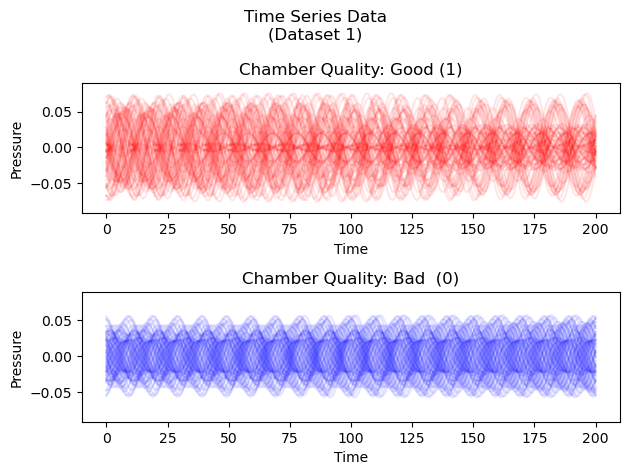

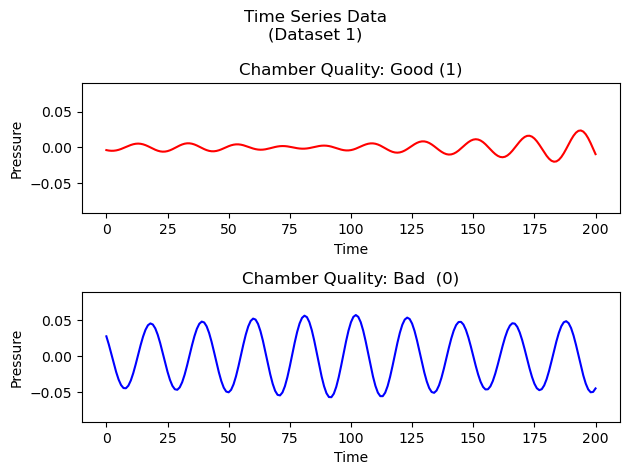

In [26]:
# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Time Series Data\n(Dataset 1)")

ylim_max = np.max(x_1_raw)*1.2
ylim_min = np.min(x_1_raw)*1.2

ax[0].plot(x_1_raw[y_1_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Pressure")
ax[0].set_ylim([ylim_min, ylim_max])

ax[1].plot(x_1_raw[y_1_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Pressure")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Time Series Data\n(Dataset 1)")

ylim_max = np.max(x_1_raw)*1.2
ylim_min = np.min(x_1_raw)*1.2

ax[0].plot(x_1_raw[y_1_raw==1][-1].T, "r", alpha=1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Pressure")
ax[0].set_ylim([ylim_min, ylim_max])

ax[1].plot(x_1_raw[y_1_raw==0][-1].T, "b", alpha=1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Pressure")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

## 2.4 Time Series Data (Dataset 2)

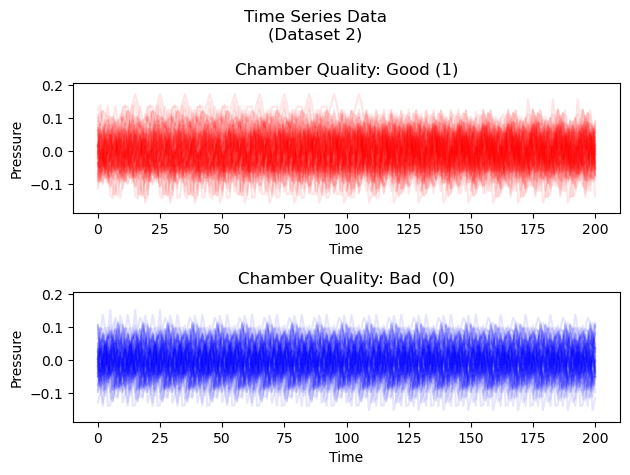

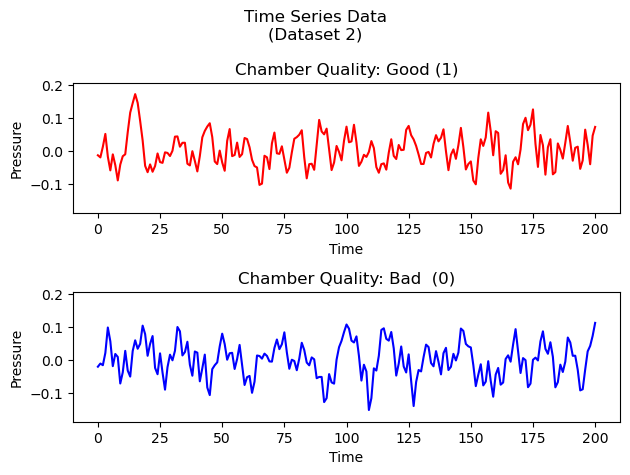

In [27]:
# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Time Series Data\n(Dataset 2)")

ylim_max = np.max(x_2_raw)*1.2
ylim_min = np.min(x_2_raw)*1.2

ax[0].plot(x_2_raw[y_2_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Pressure")
ax[0].set_ylim([ylim_min, ylim_max])

ax[1].plot(x_2_raw[y_2_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Pressure")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Time Series Data\n(Dataset 2)")

ylim_max = np.max(x_2_raw)*1.2
ylim_min = np.min(x_2_raw)*1.2

ax[0].plot(x_2_raw[y_2_raw==1][-1].T, "r", alpha=1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Pressure")
ax[0].set_ylim([ylim_min, ylim_max])

ax[1].plot(x_2_raw[y_2_raw==0][-1].T, "b", alpha=1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Pressure")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

## 2.5 Time Series Data (Normalized) (Dataset 1)

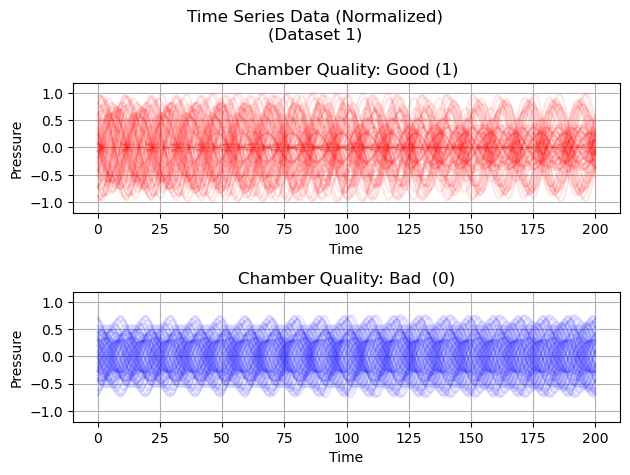

In [28]:
x_1_norm = x_1_raw / np.max(np.abs(x_1_raw))

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Time Series Data (Normalized)\n(Dataset 1)")

ylim_max = np.max(x_1_norm)*1.2
ylim_min = np.min(x_1_norm)*1.2

ax[0].plot(x_1_norm[y_1_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Pressure")
ax[0].set_ylim([ylim_min, ylim_max])
ax[0].set_yticks(np.arange(-1, 1.5, 0.5))
ax[0].grid()

ax[1].plot(x_1_norm[y_1_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Pressure")
ax[1].set_ylim([ylim_min, ylim_max])
ax[1].set_yticks(np.arange(-1, 1.5, 0.5))
ax[1].grid()

plt.tight_layout()

## 2.6 Time Series Data (Normalized) (Dataset 2)

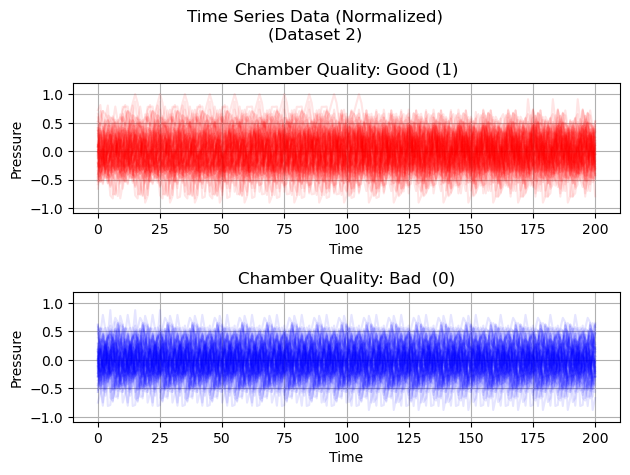

In [29]:
x_2_norm = x_2_raw / np.max(np.abs(x_2_raw))

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Time Series Data (Normalized)\n(Dataset 2)")

ylim_max = np.max(x_2_norm)*1.2
ylim_min = np.min(x_2_norm)*1.2

ax[0].plot(x_2_norm[y_2_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Pressure")
ax[0].set_ylim([ylim_min, ylim_max])
ax[0].set_yticks(np.arange(-1, 1.5, 0.5))
ax[0].grid()

ax[1].plot(x_2_norm[y_2_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Pressure")
ax[1].set_ylim([ylim_min, ylim_max])
ax[1].set_yticks(np.arange(-1, 1.5, 0.5))
ax[1].grid()

plt.tight_layout()

## 2.7 Wavelet Decomposition (Dataset 1)

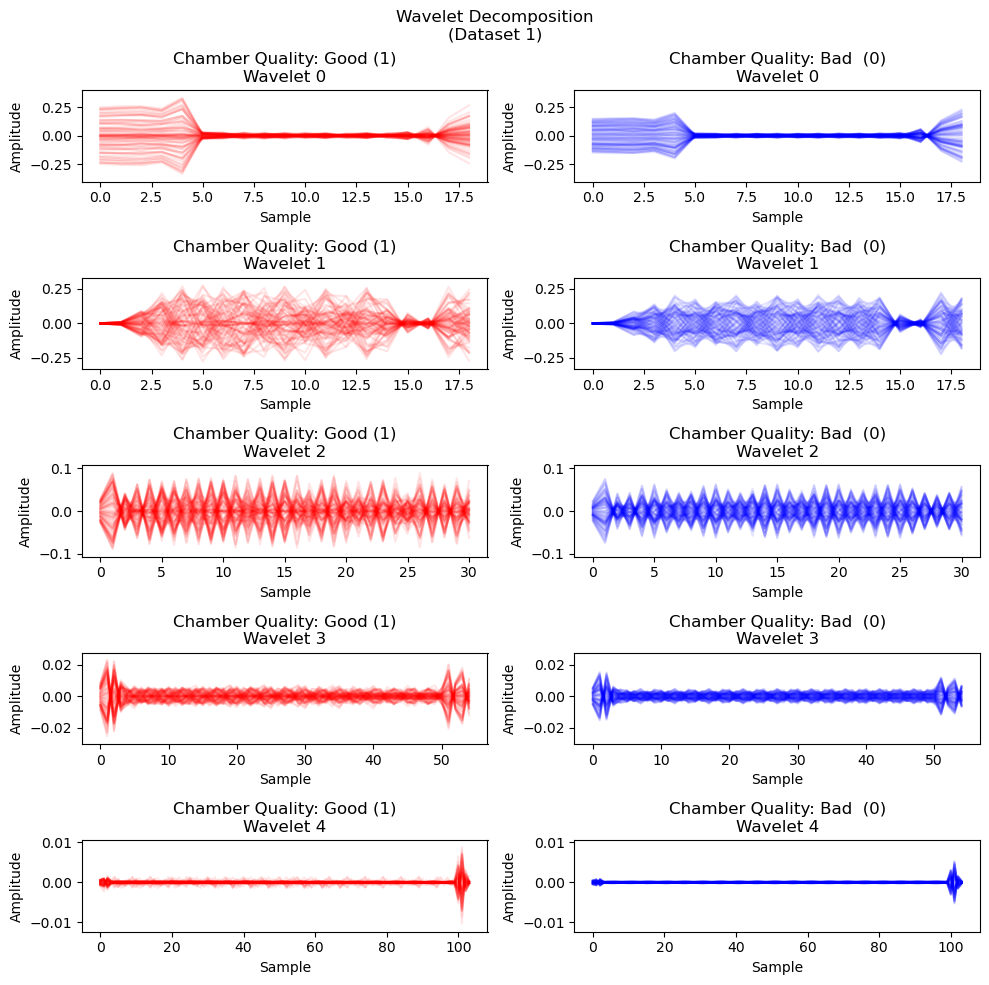

In [30]:
# Wavelet Decomposition

coeffs_1_raw = pywt.wavedec(data=x_1_raw, wavelet="db4", level=4)

# ----
# Plot
# ----

fig, ax = plt.subplots(len(coeffs_1_raw), 2, figsize=(10, 10))
fig.suptitle("Wavelet Decomposition\n(Dataset 1)")

for i, detail in enumerate(coeffs_1_raw):

    ylim_max = np.max(detail)*1.2
    ylim_min = np.min(detail)*1.2

    ax[i][0].plot(detail[y_1_raw==1].T, "r", alpha=0.1)        
    ax[i][0].set_title('Chamber Quality: Good (1)\nWavelet %s' % i)
    ax[i][0].set_xlabel('Sample')
    ax[i][0].set_ylabel('Amplitude')
    ax[i][0].set_ylim([ylim_min, ylim_max])

    ax[i][1].plot(detail[y_1_raw==0].T, "b", alpha=0.1)  
    ax[i][1].set_title('Chamber Quality: Bad  (0)\nWavelet %s' % i)
    ax[i][1].set_xlabel('Sample')
    ax[i][1].set_ylabel('Amplitude')
    ax[i][1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()
plt.show()

## 2.8 Wavelet Decomposition (Dataset 2)

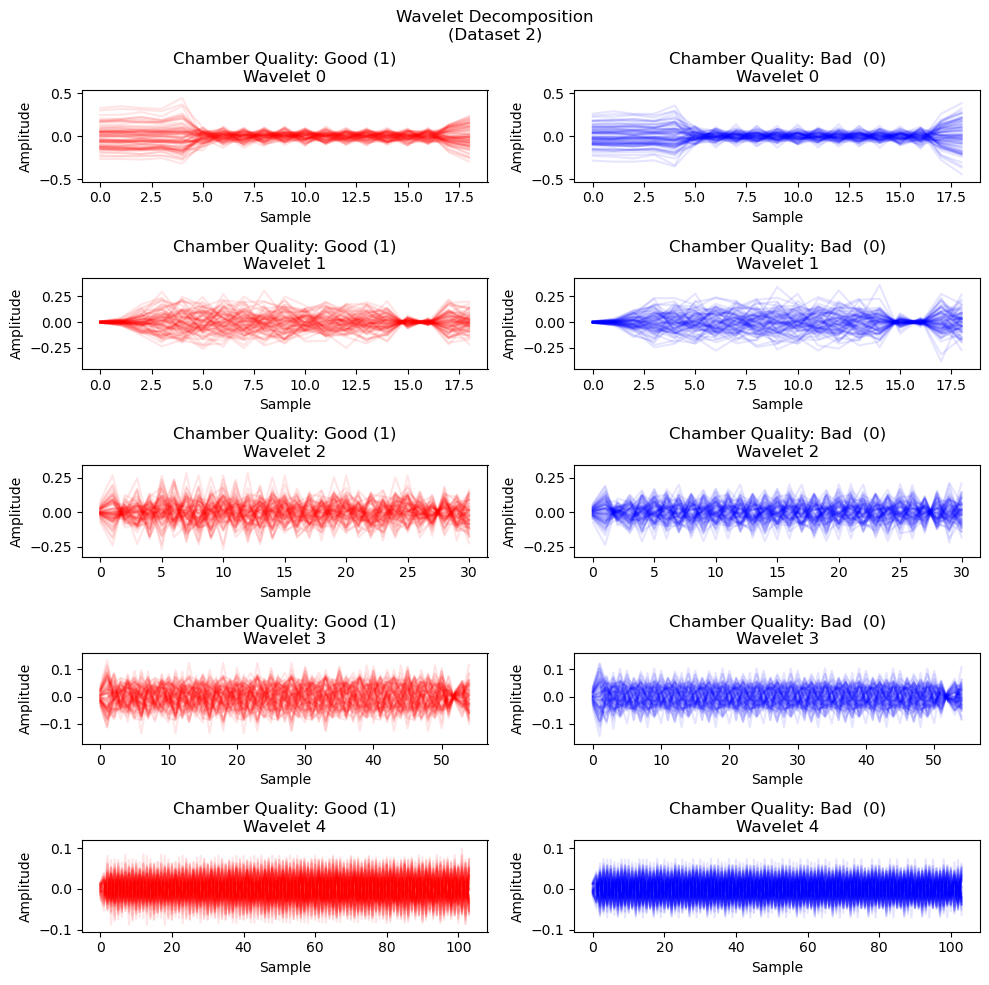

In [31]:
# Wavelet Decomposition

coeffs_2_raw = pywt.wavedec(data=x_2_raw, wavelet="db4", level=4)

# ----
# Plot
# ----

fig, ax = plt.subplots(len(coeffs_2_raw), 2, figsize=(10, 10))
fig.suptitle("Wavelet Decomposition\n(Dataset 2)")

for i, detail in enumerate(coeffs_2_raw):

    ylim_max = np.max(detail)*1.2
    ylim_min = np.min(detail)*1.2

    ax[i][0].plot(detail[y_2_raw==1].T, "r", alpha=0.1)        
    ax[i][0].set_title('Chamber Quality: Good (1)\nWavelet %s' % i)
    ax[i][0].set_xlabel('Sample')
    ax[i][0].set_ylabel('Amplitude')
    ax[i][0].set_ylim([ylim_min, ylim_max])

    ax[i][1].plot(detail[y_2_raw==0].T, "b", alpha=0.1)  
    ax[i][1].set_title('Chamber Quality: Bad  (0)\nWavelet %s' % i)
    ax[i][1].set_xlabel('Sample')
    ax[i][1].set_ylabel('Amplitude')
    ax[i][1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()
plt.show()

## 2.9 Histogram Data for Each Label (Dataset 1)

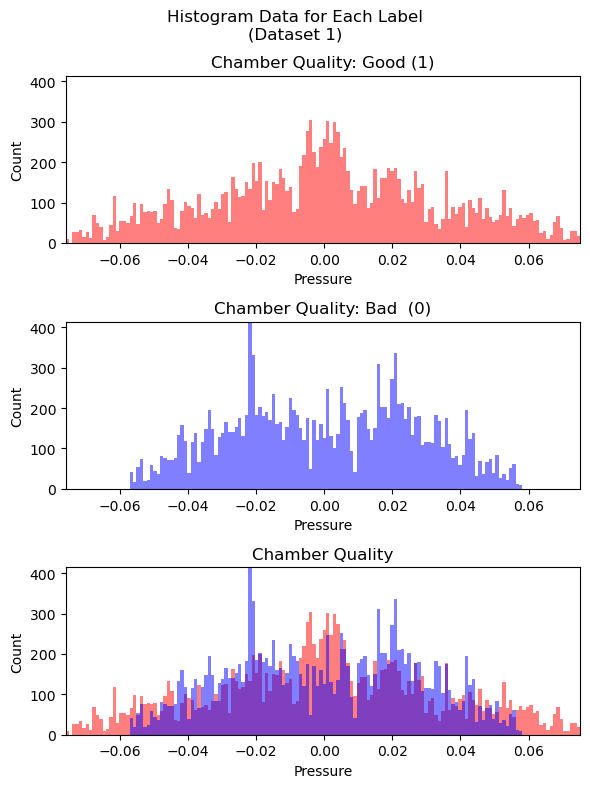

In [32]:
x_1_raw_bins = np.linspace(-0.1, 0.1, num=202)

x_1_raw_hist_label_1 = np.histogram(x_1_raw[y_1_raw==1].reshape(-1), bins=x_1_raw_bins)[0]
x_1_raw_hist_label_0 = np.histogram(x_1_raw[y_1_raw==0].reshape(-1), bins=x_1_raw_bins)[0]

# ----
# Plot
# ----

fig, ax = plt.subplots(3, 1, figsize=(6, 8))

fig.suptitle("Histogram Data for Each Label\n(Dataset 1)")

ylim_max = max(np.max(x_1_raw_hist_label_1), np.max(x_1_raw_hist_label_0))
ylim_min = 0
xlim_max = np.max(x_1_raw)
xlim_min = np.min(x_1_raw)

ax[0].hist(x_1_raw_bins[:-1], x_1_raw_bins, weights=x_1_raw_hist_label_1, color="r", alpha=0.5)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_xlim([xlim_min, xlim_max])
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])

ax[1].hist(x_1_raw_bins[:-1], x_1_raw_bins, weights=x_1_raw_hist_label_0, color="b", alpha=0.5)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_xlim([xlim_min, xlim_max])
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

ax[2].hist(x_1_raw_bins[:-1], x_1_raw_bins, weights=x_1_raw_hist_label_1, color="r", alpha=0.5)
ax[2].hist(x_1_raw_bins[:-1], x_1_raw_bins, weights=x_1_raw_hist_label_0, color="b", alpha=0.5)
ax[2].set_title("Chamber Quality")
ax[2].set_xlabel("Pressure")
ax[2].set_xlim([xlim_min, xlim_max])
ax[2].set_ylabel("Count")
ax[2].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

# ----
# Plot
# ----

# fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# fig.suptitle("Histogram Data for Each Label\n(Dataset 1)")

# ylim_max = max(np.max(x_1_raw_hist_label_1), np.max(x_1_raw_hist_label_0))
# ylim_min = 0
# xlim_max = np.max(x_1_raw)
# xlim_min = np.min(x_1_raw)

# ax.hist(x_1_raw_bins[:-1], x_1_raw_bins, weights=x_1_raw_hist_label_1, color="r", alpha=0.5)
# ax.hist(x_1_raw_bins[:-1], x_1_raw_bins, weights=x_1_raw_hist_label_0, color="b", alpha=0.5)
# ax.set_title("Chamber Quality")
# ax.set_xlabel("Pressure")
# ax.set_xlim([xlim_min, xlim_max])
# ax.set_ylabel("Count")
# ax.set_ylim([ylim_min, ylim_max])
# ax.legend(["Chamber Quality: Good (1)", "Chamber Quality: Bad  (2)"])

# plt.tight_layout()

## 2.10 Histogram Data for Each Label (Dataset 2)

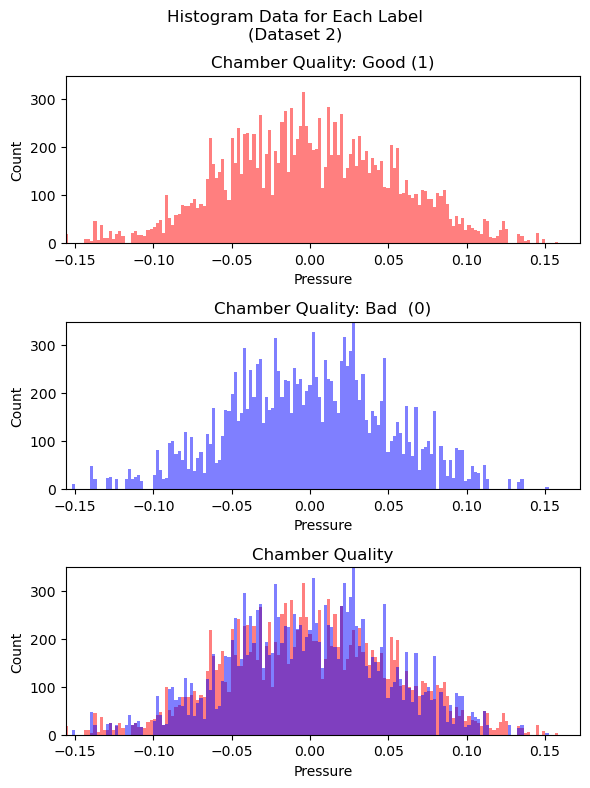

In [33]:
x_2_raw_bins = np.linspace(-0.2, 0.2, num=202)

x_2_raw_hist_label_1 = np.histogram(x_2_raw[y_2_raw==1].reshape(-1), bins=x_2_raw_bins)[0]
x_2_raw_hist_label_0 = np.histogram(x_2_raw[y_2_raw==0].reshape(-1), bins=x_2_raw_bins)[0]

# ----
# Plot
# ----

fig, ax = plt.subplots(3, 1, figsize=(6, 8))

fig.suptitle("Histogram Data for Each Label\n(Dataset 2)")

ylim_max = max(np.max(x_2_raw_hist_label_1), np.max(x_2_raw_hist_label_0))
ylim_min = 0
xlim_max = np.max(x_2_raw)
xlim_min = np.min(x_2_raw)

ax[0].hist(x_2_raw_bins[:-1], x_2_raw_bins, weights=x_2_raw_hist_label_1, color="r", alpha=0.5)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_xlim([xlim_min, xlim_max])
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])

ax[1].hist(x_2_raw_bins[:-1], x_2_raw_bins, weights=x_2_raw_hist_label_0, color="b", alpha=0.5)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_xlim([xlim_min, xlim_max])
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

ax[2].hist(x_2_raw_bins[:-1], x_2_raw_bins, weights=x_2_raw_hist_label_1, color="r", alpha=0.5)
ax[2].hist(x_2_raw_bins[:-1], x_2_raw_bins, weights=x_2_raw_hist_label_0, color="b", alpha=0.5)
ax[2].set_title("Chamber Quality")
ax[2].set_xlabel("Pressure")
ax[2].set_xlim([xlim_min, xlim_max])
ax[2].set_ylabel("Count")
ax[2].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

# ----
# Plot
# ----

# fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# fig.suptitle("Histogram Data for Each Label\n(Dataset 2)")

# ylim_max = max(np.max(x_2_raw_hist_label_1), np.max(x_2_raw_hist_label_0))
# ylim_min = 0
# xlim_max = np.max(x_2_raw)
# xlim_min = np.min(x_2_raw)

# ax.hist(x_2_raw_bins[:-1], x_2_raw_bins, weights=x_2_raw_hist_label_1, color="r", alpha=0.5)
# ax.hist(x_2_raw_bins[:-1], x_2_raw_bins, weights=x_2_raw_hist_label_0, color="b", alpha=0.5)
# ax.set_title("Chamber Quality")
# ax.set_xlabel("Pressure")
# ax.set_xlim([xlim_min, xlim_max])
# ax.set_ylabel("Count")
# ax.set_ylim([ylim_min, ylim_max])
# ax.legend(["Chamber Quality: Good (1)", "Chamber Quality: Bad  (2)"])

# plt.tight_layout()

## 2.11 Histogram Data (Dataset 1)

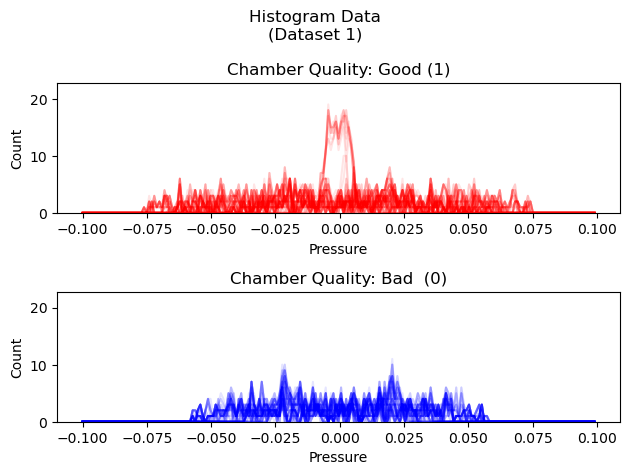

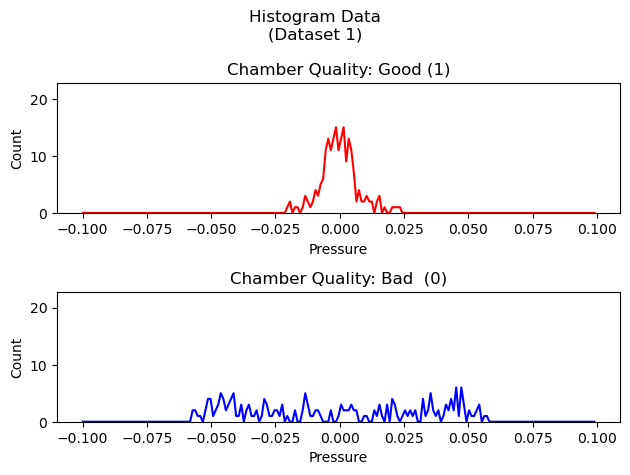

In [34]:
x_1_raw_bins = np.linspace(-0.1, 0.1, num=202)
x_1_raw_hist = np.apply_along_axis(lambda t: np.histogram(t, bins=x_1_raw_bins)[0], 1, x_1_raw)

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data\n(Dataset 1)")

ylim_max = np.max(x_1_raw_hist)*1.2
ylim_min = 0

ax[0].plot(x_1_raw_bins[:-1], x_1_raw_hist[y_1_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_1_raw_bins[:-1], x_1_raw_hist[y_1_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()


# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data\n(Dataset 1)")

ylim_max = np.max(x_1_raw_hist)*1.2
ylim_min = 0

ax[0].plot(x_1_raw_bins[:-1], x_1_raw_hist[y_1_raw==1][-1].T, "r", alpha=1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_1_raw_bins[:-1], x_1_raw_hist[y_1_raw==0][-1].T, "b", alpha=1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

## 2.12 Histogram Data (Dataset 2)

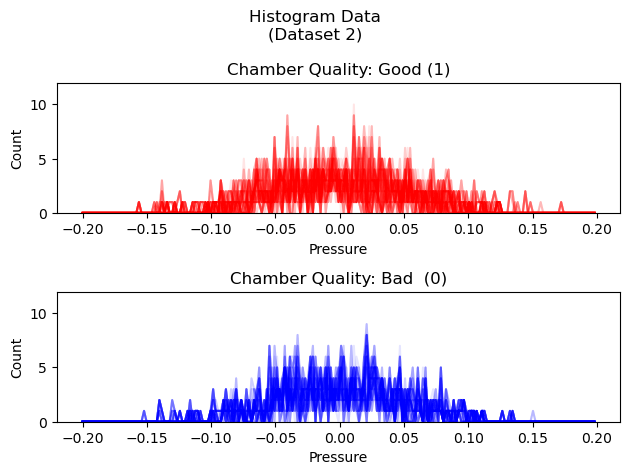

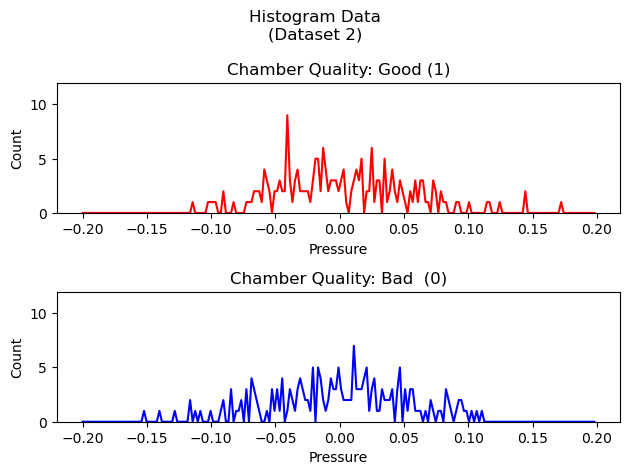

In [35]:
x_2_raw_bins = np.linspace(-0.2, 0.2, num=202)
x_2_raw_hist = np.apply_along_axis(lambda t: np.histogram(t, bins=x_2_raw_bins)[0], 1, x_2_raw)

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data\n(Dataset 2)")

ylim_max = np.max(x_2_raw_hist)*1.2
ylim_min = 0

ax[0].plot(x_2_raw_bins[:-1], x_2_raw_hist[y_2_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_2_raw_bins[:-1], x_2_raw_hist[y_2_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data\n(Dataset 2)")

ylim_max = np.max(x_2_raw_hist)*1.2
ylim_min = 0

ax[0].plot(x_2_raw_bins[:-1], x_2_raw_hist[y_2_raw==1][-1].T, "r", alpha=1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_2_raw_bins[:-1], x_2_raw_hist[y_2_raw==0][-1].T, "b", alpha=1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

## 2.13 Histogram Data (Normalized) (Dataset 1)

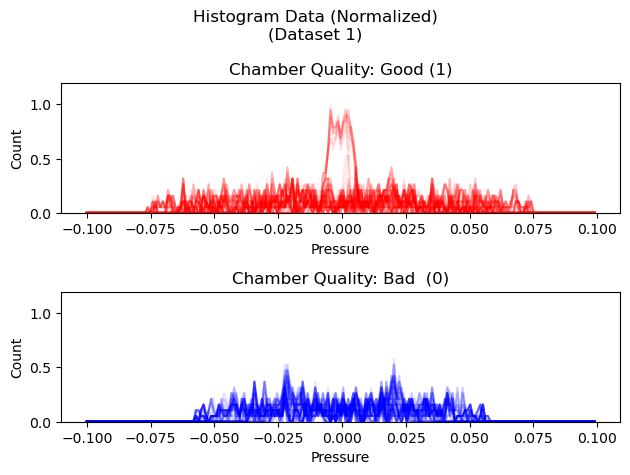

In [36]:
x_1_raw_hist_max = np.max(x_1_raw_hist)
x_1_raw_hist_norm = x_1_raw_hist / x_1_raw_hist_max

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data (Normalized)\n(Dataset 1)")

ylim_max = np.max(x_1_raw_hist_norm)*1.2
ylim_min = 0

ax[0].plot(x_1_raw_bins[:-1], x_1_raw_hist_norm[y_1_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_1_raw_bins[:-1], x_1_raw_hist_norm[y_1_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

## 2.14 Histogram Data (Normalized) (Dataset 2)

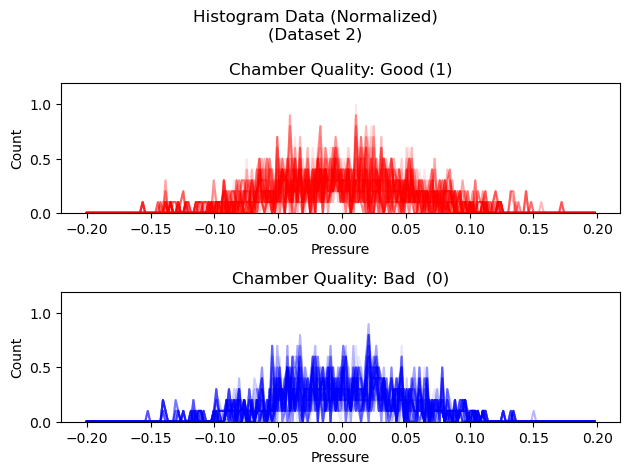

In [37]:
x_2_raw_hist_max = np.max(x_2_raw_hist)
x_2_raw_hist_norm = x_2_raw_hist / x_2_raw_hist_max

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data (Normalized)\n(Dataset 2)")

ylim_max = np.max(x_2_raw_hist_norm)*1.2
ylim_min = 0

ax[0].plot(x_2_raw_bins[:-1], x_2_raw_hist_norm[y_2_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_2_raw_bins[:-1], x_2_raw_hist_norm[y_2_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

# 3 Experiment
- [3.1 Split Dataset into Train and Test](#3.1-Split-Dataset-into-Train-and-Test)
- [3.2 Logistic Regression](#3.2-Logistic-Regression)
- [3.3 Logistic Regression in Scikit-Learn](#3.3-Logistic-Regression-in-Scikit-Learn)
- [3.4 Neural Network in PyTorch](#3.4-Neural-Network-in-PyTorch)
- [3.5 Neural Network in Scikit-Learn](#3.5-Neural-Network-in-Scikit-Learn)

## 3.1 Split Dataset into Train and Test

In [38]:
def split_dataset(x, y, split_ratio=0.9, verbose=True):
    # Shuffle Dataset
    class_0_idx = np.where(y==0)[0]
    class_1_idx = np.where(y==1)[0]

    # np.random.seed(0) # control the shuffle result
    np.random.shuffle(class_0_idx)
    np.random.shuffle(class_1_idx)

    # Split Dataset into Train and Test
    class_0_num_train = round(len(class_0_idx) * split_ratio)
    class_0_idx_train = class_0_idx[:class_0_num_train]
    class_0_idx_test  = class_0_idx[class_0_num_train:]

    class_1_num_train = round(len(class_1_idx) * split_ratio)
    class_1_idx_train = class_1_idx[:class_1_num_train]
    class_1_idx_test  = class_1_idx[class_1_num_train:]
    
    if verbose:
        print("Split class 0 into => %s:%s" % (len(class_0_idx_train), len(class_0_idx_test)))
        print("Split class 1 into => %s:%s" % (len(class_1_idx_train), len(class_1_idx_test)))

    x_train = np.concatenate((x[class_0_idx_train], x[class_1_idx_train]), axis=0)
    y_train = np.concatenate((y[class_0_idx_train], y[class_1_idx_train]), axis=0)

    x_test  = np.concatenate((x[class_0_idx_test],  x[class_1_idx_test]),  axis=0)
    y_test  = np.concatenate((y[class_0_idx_test],  y[class_1_idx_test]),  axis=0)

    if verbose:
        print("Split dataset into => %s:%s" % (len(y_train), len(y_test)))

        print("")
        print("x_train: %10s, max: %5.2f, min: %5.2f" % (x_train.shape, np.max(x_train), np.min(x_train)))
        print("x_test:  %10s, max: %5.2f, min: %5.2f" % (x_test.shape,  np.max(x_test),  np.min(x_test)))

        print("y_train: %10s, max: %5.2f, min: %5.2f" % (y_train.shape, np.max(y_train), np.min(y_train)))
        print("y_test:  %10s, max: %5.2f, min: %5.2f" % (y_test.shape,  np.max(y_test),  np.min(y_test)))
    
    return x_train, y_train, x_test, y_test

## 3.2 Logistic Regression

In [39]:
# Model (y = wx)
def model(x, w):
    result = w[0] + np.dot(x, w[1:])
    return result


# Activation Function
def sigmoid(x):
    result = 1 / (1 + np.exp(-x))
    return result


# Cost Function - Cross Entropy (Lec4 - P12)
def cross_entropy(w, x, y):
    temp = sigmoid(model(x, w))
    
    cost = 0

    ind = np.argwhere(y==0)[:,0]
    cost += -np.sum(np.log(1-temp[ind,:]))

    ind = np.argwhere(y==1)[:,0]
    cost += -np.sum(np.log(temp[ind,:]))

    cost /= y.size
    return cost


# Cost Function - Wrapper - Basic
def cost_function_basic(w):
    result = cross_entropy(w, x_train, y_train)
    return result


# Cost Function - Wrapper - Regularization
def cost_function_regularization(w):
    result = cross_entropy(w, x_train, y_train) + 0.01 * np.sum(w[1:]**2)
    return result


# Trainning Process (Gradient Descent)
def gradient_descent(g, step_size, max_iter, w):
    
    gradient = grad(g)

    history_weight = [w]
    history_cost   = [g(w)]

    for k in range(max_iter):
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)

        w = w - step_size * grad_eval_norm
        
        history_weight.append(w)
        history_cost.append(g(w))
    
    return history_weight, history_cost

def predict(x, w):
    result = sigmoid(model(x, w))          # [0-1] contineous
    result = np.sign(result-0.5) / 2 + 0.5 # [0,1] descrete
    return result

Split class 0 into => 69:8
Split class 1 into => 69:8
Split dataset into => 138:16

x_train: (138, 201), max:  0.95, min:  0.00
x_test:   (16, 201), max:  1.00, min:  0.00
y_train:     (138,), max:  1.00, min:  0.00
y_test:       (16,), max:  1.00, min:  0.00

Training Time: 0.7679s

Initial Loss: 3.2836551791581616
Final   Loss: 0.473222523505198

Confusion Matrix:
[[8 0]
 [0 8]]

Accuracy: 1.0000


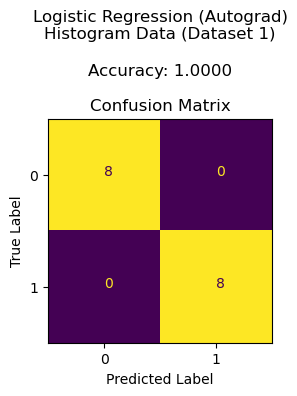

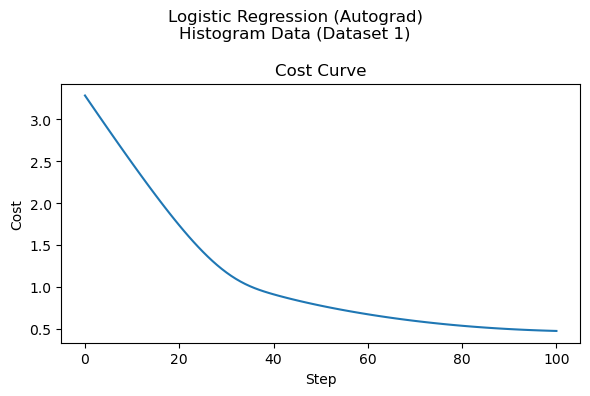

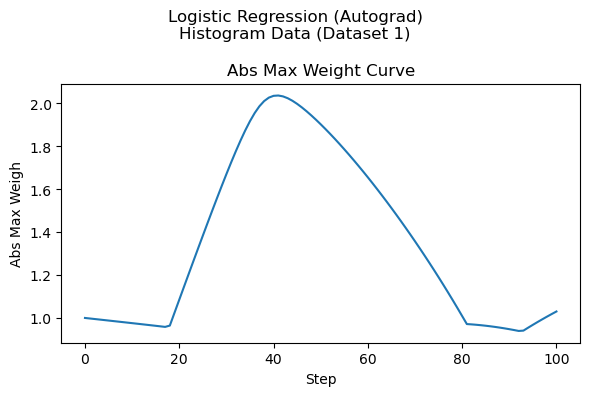

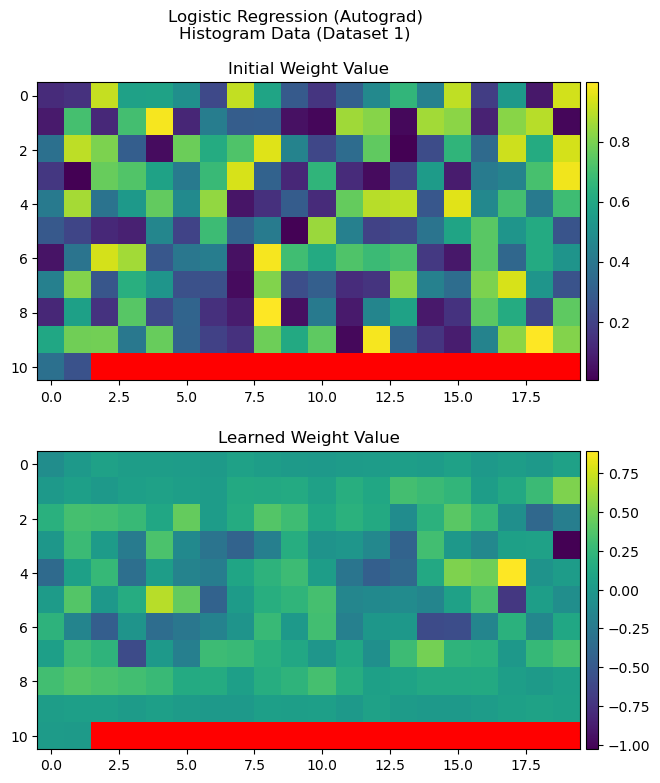

In [40]:
# data_type = "Time Series Data"
data_type = "Histogram Data"
dataset_no = 1
# dataset_no = 2

history_training_time = []
history_accuracy = []

experiment_num = 1
# experiment_num = 100
for i in range(experiment_num):
    
    if data_type == "Time Series Data" and dataset_no == 1:
        max_iter = 300
        x_train, y_train, x_test, y_test = split_dataset(x_1_norm, y_1_raw, verbose=(experiment_num==1))

    elif data_type == "Time Series Data" and dataset_no == 2:
        max_iter = 100
        x_train, y_train, x_test, y_test = split_dataset(x_2_norm, y_2_raw, verbose=(experiment_num==1))

    elif data_type == "Histogram Data" and dataset_no == 1:
        max_iter = 100
        x_train, y_train, x_test, y_test = split_dataset(x_1_raw_hist_norm, y_1_raw, verbose=(experiment_num==1))

    elif data_type == "Histogram Data" and dataset_no == 2:
        max_iter = 120
        x_train, y_train, x_test, y_test = split_dataset(x_2_raw_hist_norm, y_2_raw, verbose=(experiment_num==1))
    else:
        raise Exception("Wrong Input")

    step_size = 0.1

    feature_num = x_train.shape[1]

    w_initial = np.random.rand((feature_num+1), 1) # initial weight

    use_regularization = True

    if use_regularization:
        cost_function = cost_function_regularization
    else:
        cost_function = cost_function_basic

    _time = time.time()
    history_weight, history_cost = gradient_descent(
        g=cost_function, 
        step_size=step_size, 
        max_iter=max_iter, 
        w=w_initial
    )

    training_time = time.time()-_time
    
    if experiment_num == 1:
        print()
        print("Training Time: %.4fs" % training_time)

        print()
        print("Initial Loss: %s" % history_cost[0])
        print("Final   Loss: %s" % history_cost[-1])

    w_learned = history_weight[-1]

    y_pred = predict(x_test, w_learned)

    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)

    if experiment_num == 1:
        print()
        print("Confusion Matrix:")
        print(cm)

        print()
        print("Accuracy: %.4f" % ac)
    
    history_training_time.append(training_time)
    history_accuracy.append(ac)

if experiment_num != 1:
    avg_training_time = np.mean(history_training_time)
    avg_accuracy = np.mean(history_accuracy)

    print()
    print("Average Training Time: %.4fs" % avg_training_time)
    print()
    print("Average Accuracy: %.4f" % avg_accuracy)
    print("Average Accuracy STD: %.4f" % np.std(history_accuracy))

# ----
# Plot Confusion Matrix
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Logistic Regression (Autograd)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Accuracy: %.4f\n\nConfusion Matrix" % ac)

im = ax.imshow(cm)
cmap_min, cmap_max = im.cmap(0), im.cmap(1.0)
thresh = (cm.max() + cm.min()) / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = cmap_max if cm[i, j] < thresh else cmap_min
        ax.text(j, i, cm[i, j], color=color)

ax.set(
    xticks=np.arange(cm.shape[0]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=range(cm.shape[0]),
    yticklabels=range(cm.shape[0]),
    ylabel="True Label",
    xlabel="Predicted Label",
)

plt.tight_layout()

# ----
# Plot Cost Curve
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Logistic Regression (Autograd)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Cost Curve")

ax.set_xlabel("Step")
ax.set_ylabel("Cost")

ax.plot(history_cost)

plt.tight_layout()

# ----
# Plot Abs Max Weight Curve
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Logistic Regression (Autograd)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Abs Max Weight Curve")

ax.set_xlabel("Step")
ax.set_ylabel("Abs Max Weigh")

ax.plot([np.max(np.abs(weight)) for weight in history_weight])

plt.tight_layout()

# ----
# Plot Weight Heatmap
# ----

fig, ax = plt.subplots(2, 1, figsize=(6,8))

fig.suptitle("Logistic Regression (Autograd)\n%s (Dataset %s)" % (data_type, dataset_no))

ax[0].set_title("Initial Weight Value")
ax[1].set_title("Learned Weight Value")

imshow_w_initial = w_initial.reshape(-1)
imshow_w_learned = w_learned.reshape(-1)

imshow_width = 20
if len(imshow_w_initial)%imshow_width != 0:
    imshow_na = np.empty(imshow_width-len(imshow_w_initial)%imshow_width)
    imshow_na[:] = np.nan
    imshow_w_initial = np.concatenate((imshow_w_initial, imshow_na))
    imshow_w_learned = np.concatenate((imshow_w_learned, imshow_na))

cmap = plt.get_cmap("viridis")
cmap.set_bad("red", 1.)

im0 = ax[0].imshow(imshow_w_initial.reshape(-1, imshow_width), cmap=cmap)
im1 = ax[1].imshow(imshow_w_learned.reshape(-1, imshow_width), cmap=cmap)

plt.tight_layout()

cax0 = fig.add_axes([
    ax[0].get_position().x1 + 0.01,                   # left
    ax[0].get_position().y0,                          # bottom
    0.02,                                             # width
    ax[0].get_position().y1 - ax[0].get_position().y0 # height
])
cbar0 = fig.colorbar(im0, cax=cax0)

cax1 = fig.add_axes([
    ax[1].get_position().x1 + 0.01,                   # left
    ax[1].get_position().y0,                          # bottom
    0.02,                                             # width
    ax[1].get_position().y1 - ax[1].get_position().y0 # height
])
cbar1 = fig.colorbar(im1, cax=cax1)

## 3.3 Logistic Regression in Scikit-Learn

Split class 0 into => 69:8
Split class 1 into => 69:8
Split dataset into => 138:16

x_train: (138, 201), max:  1.00, min:  0.00
x_test:   (16, 201), max:  0.95, min:  0.00
y_train:     (138,), max:  1.00, min:  0.00
y_test:       (16,), max:  1.00, min:  0.00

Iteration Number: 20
Training Time: 0.1153s

Confusion Matrix:
[[8 0]
 [0 8]]

Accuracy: 1.0000


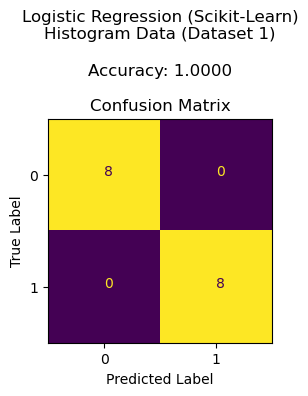

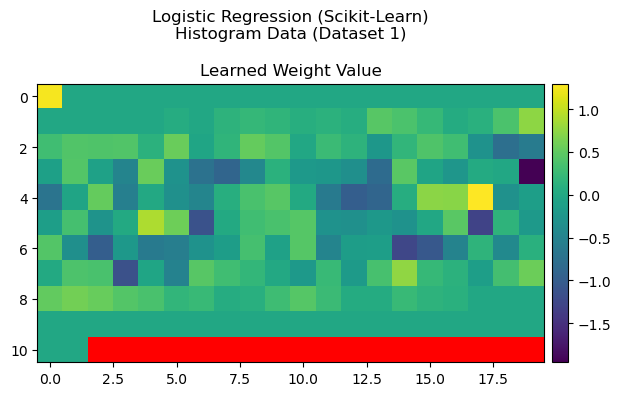

In [41]:
# data_type = "Time Series Data"
data_type = "Histogram Data"
dataset_no = 1
# dataset_no = 2

history_iteration_num = []
history_training_time = []
history_accuracy = []

experiment_num = 1
# experiment_num = 100
for i in range(experiment_num):

    if data_type == "Time Series Data" and dataset_no == 1:
        x_train, y_train, x_test, y_test = split_dataset(x_1_norm, y_1_raw, verbose=(experiment_num==1))

    elif data_type == "Time Series Data" and dataset_no == 2:
        x_train, y_train, x_test, y_test = split_dataset(x_2_norm, y_2_raw, verbose=(experiment_num==1))

    elif data_type == "Histogram Data" and dataset_no == 1:
        x_train, y_train, x_test, y_test = split_dataset(x_1_raw_hist_norm, y_1_raw, verbose=(experiment_num==1))

    elif data_type == "Histogram Data" and dataset_no == 2:
        x_train, y_train, x_test, y_test = split_dataset(x_2_raw_hist_norm, y_2_raw, verbose=(experiment_num==1))
    else:
        raise Exception("Wrong Input")

    _time = time.time()
    classifier = LogisticRegression(max_iter=5000)
    classifier.fit(x_train, y_train.reshape(-1))
    training_time = time.time()-_time
    
    iteration_num = classifier.n_iter_[0]
    if experiment_num == 1:
        print()
        print("Iteration Number: %s" % iteration_num)
        print("Training Time: %.4fs" % training_time)

    y_pred = classifier.predict(x_test).reshape(-1, 1)

    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)

    if experiment_num == 1:
        print()
        print("Confusion Matrix:")
        print(cm)

        print()
        print("Accuracy: %.4f" % ac)

    history_iteration_num.append(iteration_num)
    history_training_time.append(training_time)
    history_accuracy.append(ac)

if experiment_num != 1:
    avg_iteration_num = np.mean(history_iteration_num)
    avg_training_time = np.mean(history_training_time)
    avg_accuracy = np.mean(history_accuracy)

    print()
    print("Average Iteration Num: %.4f" % avg_iteration_num)
    print("Average Training Time: %.4fs" % avg_training_time)
    print()
    print("Average Accuracy: %.4f" % avg_accuracy)
    print("Average Accuracy STD: %.4f" % np.std(history_accuracy))

# ----
# Plot Confusion Matrix
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Logistic Regression (Scikit-Learn)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Accuracy: %.4f\n\nConfusion Matrix" % ac)

im = ax.imshow(cm)
cmap_min, cmap_max = im.cmap(0), im.cmap(1.0)
thresh = (cm.max() + cm.min()) / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = cmap_max if cm[i, j] < thresh else cmap_min
        ax.text(j, i, cm[i, j], color=color)

ax.set(
    xticks=np.arange(cm.shape[0]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=range(cm.shape[0]),
    yticklabels=range(cm.shape[0]),
    ylabel="True Label",
    xlabel="Predicted Label",
)

plt.tight_layout()

# ----
# Plot Weight Heatmap
# ----

fig, ax = plt.subplots(1, 1, figsize=(8,4))

fig.suptitle("Logistic Regression (Scikit-Learn)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Learned Weight Value")

imshow_w_learned = np.concatenate([classifier.intercept_, classifier.coef_.reshape(-1)])

imshow_width = 20
if len(imshow_w_learned)%imshow_width != 0:
    imshow_na = np.empty(imshow_width-len(imshow_w_learned)%imshow_width)
    imshow_na[:] = np.nan
    imshow_w_learned = np.concatenate((imshow_w_learned, imshow_na))

cmap = plt.get_cmap("viridis")
cmap.set_bad("red", 1.)

im = ax.imshow(imshow_w_learned.reshape(-1, imshow_width), cmap=cmap)

plt.tight_layout()

cax = fig.add_axes([
    ax.get_position().x1 + 0.01,                # left
    ax.get_position().y0,                       # bottom
    0.02,                                       # width
    ax.get_position().y1 - ax.get_position().y0 # height
])
cbar = fig.colorbar(im, cax=cax)

## 3.4 Neural Network in PyTorch

In [42]:
def torch_train(x, y, num_epochs):
    x_tensor = torch.Tensor(x)
    y_tensor = torch.Tensor(y).reshape(-1, 1)

    history_cost = []
    history_lr = []

    model_pth.train()
    for n in range(num_epochs):

        y_pred_tensor = model_pth(x_tensor)
        
        loss = criterion(y_pred_tensor, y_tensor)
        
        history_cost.append(loss.detach())
        history_lr.append(scheduler.get_last_lr())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        scheduler.step()
        
    return history_cost, history_lr


def torch_predict(x):
    x_tensor = torch.Tensor(x)
    model_pth.eval()
    y_pred_tensor = model_pth.forward(x_tensor)
    y_pred = y_pred_tensor.detach()
    y_pred[y_pred>0.5] = 1
    y_pred[y_pred<0.5] = 0
    return y_pred


def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_uniform_(m.weight)
        m.bias.data.fill_(0.01)

Split class 0 into => 69:8
Split class 1 into => 69:8
Split dataset into => 138:16

x_train: (138, 201), max:  1.00, min:  0.00
x_test:   (16, 201), max:  0.95, min:  0.00
y_train:     (138,), max:  1.00, min:  0.00
y_test:       (16,), max:  1.00, min:  0.00
Training Time: 0.1719s

Confusion Matrix:
[[8 0]
 [0 8]]

Accuracy: 1.0000


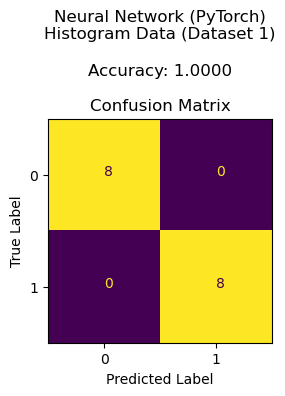

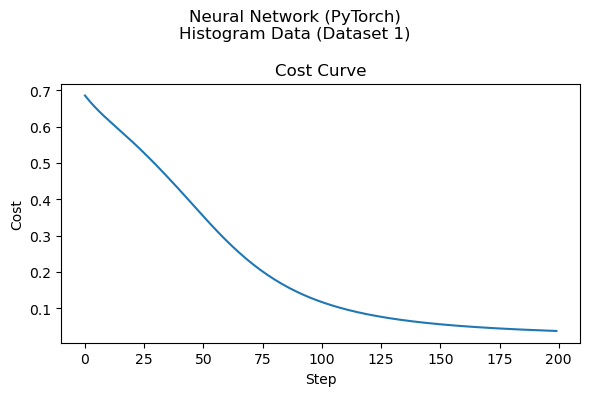

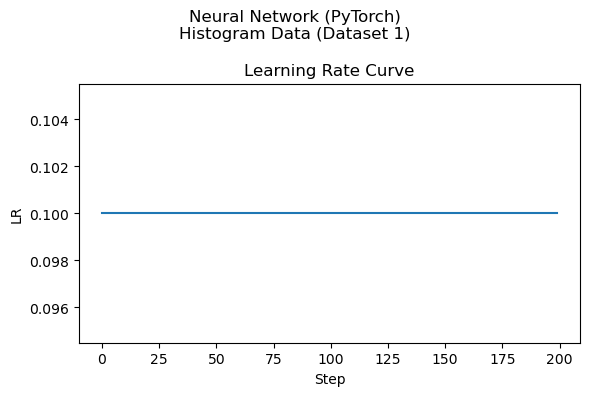

In [43]:
# data_type = "Time Series Data"
data_type = "Histogram Data"
dataset_no = 1
# dataset_no = 2

dropout_rate = 0.0
# dropout_rate = 0.5

history_training_time = []
history_accuracy = []

experiment_num = 1
# experiment_num = 100
for i in range(experiment_num):

    if data_type == "Time Series Data" and dataset_no == 1:
        x_train, y_train, x_test, y_test = split_dataset(x_1_norm, y_1_raw, verbose=(experiment_num==1))
        num_epochs = 1000

    elif data_type == "Time Series Data" and dataset_no == 2:
        x_train, y_train, x_test, y_test = split_dataset(x_2_norm, y_2_raw, verbose=(experiment_num==1))
        num_epochs = 1000

    elif data_type == "Histogram Data" and dataset_no == 1:
        x_train, y_train, x_test, y_test = split_dataset(x_1_raw_hist_norm, y_1_raw, verbose=(experiment_num==1))
        num_epochs = 200

    elif data_type == "Histogram Data" and dataset_no == 2:
        x_train, y_train, x_test, y_test = split_dataset(x_2_raw_hist_norm, y_2_raw, verbose=(experiment_num==1))
        num_epochs = 200
        
    else:
        raise Exception("Wrong Input")

    model_pth = nn.Sequential(
        nn.Linear(201, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Dropout(dropout_rate),
        nn.Linear(256, 1),
        nn.Sigmoid()
    )
    model_pth.apply(init_weights)

    criterion = nn.BCELoss()

    optimizer = torch.optim.SGD(model_pth.parameters(), lr=0.1, weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5000, gamma=0.1)

    _time = time.time()
    history_cost, history_lr = torch_train(
        x=x_train, 
        y=y_train, 
        num_epochs=num_epochs
    )
    training_time = time.time()-_time

    if experiment_num == 1:
        print("Training Time: %.4fs" % training_time)

    y_pred = torch_predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)

    if experiment_num == 1:
        print()
        print("Confusion Matrix:")
        print(cm)

        print()
        print("Accuracy: %.4f" % ac)

    history_training_time.append(training_time)
    history_accuracy.append(ac)

if experiment_num != 1:
    avg_training_time = np.mean(history_training_time)
    avg_accuracy = np.mean(history_accuracy)

    print()
    print("Average Training Time: %.4fs" % avg_training_time)
    print()
    print("Average Accuracy: %.4f" % avg_accuracy)
    print("Average Accuracy STD: %.4f" % np.std(history_accuracy))

# ----
# Plot Confusion Matrix
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Neural Network (PyTorch)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Accuracy: %.4f\n\nConfusion Matrix" % ac)

im = ax.imshow(cm)
cmap_min, cmap_max = im.cmap(0), im.cmap(1.0)
thresh = (cm.max() + cm.min()) / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = cmap_max if cm[i, j] < thresh else cmap_min
        ax.text(j, i, cm[i, j], color=color)

ax.set(
    xticks=np.arange(cm.shape[0]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=range(cm.shape[0]),
    yticklabels=range(cm.shape[0]),
    ylabel="True Label",
    xlabel="Predicted Label",
)

plt.tight_layout()

# ----
# Plot Cost Curve
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Neural Network (PyTorch)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Cost Curve")

ax.set_xlabel("Step")
ax.set_ylabel("Cost")

ax.plot(history_cost)

plt.tight_layout()

# ----
# Plot Learning Rate Curve
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Neural Network (PyTorch)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Learning Rate Curve")

ax.set_xlabel("Step")
ax.set_ylabel("LR")

ax.plot(history_lr)

plt.tight_layout()

# 3.5 Neural Network in Scikit-Learn

Split class 0 into => 69:8
Split class 1 into => 69:8
Split dataset into => 138:16

x_train: (138, 201), max:  1.00, min:  0.00
x_test:   (16, 201), max:  0.95, min:  0.00
y_train:     (138,), max:  1.00, min:  0.00
y_test:       (16,), max:  1.00, min:  0.00

Iteration Number: 12
Training Time: 0.6870s

Confusion Matrix:
[[0 8]
 [0 8]]

Accuracy: 0.5000


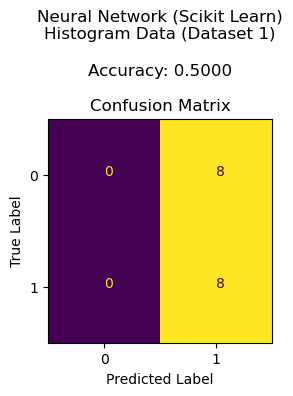

In [44]:
# data_type = "Time Series Data"
data_type = "Histogram Data"
dataset_no = 1
# dataset_no = 2

history_iteration_num = []
history_training_time = []
history_accuracy = []

experiment_num = 1
# experiment_num = 100
for i in range(experiment_num):

    if data_type == "Time Series Data" and dataset_no == 1:
        x_train, y_train, x_test, y_test = split_dataset(x_1_norm, y_1_raw, verbose=(experiment_num==1))

    elif data_type == "Time Series Data" and dataset_no == 2:
        x_train, y_train, x_test, y_test = split_dataset(x_2_norm, y_2_raw, verbose=(experiment_num==1))

    elif data_type == "Histogram Data" and dataset_no == 1:
        x_train, y_train, x_test, y_test = split_dataset(x_1_raw_hist_norm, y_1_raw, verbose=(experiment_num==1))

    elif data_type == "Histogram Data" and dataset_no == 2:
        x_train, y_train, x_test, y_test = split_dataset(x_2_raw_hist_norm, y_2_raw, verbose=(experiment_num==1))
    else:
        raise Exception("Wrong Input")

    mlp = MLPClassifier(
        hidden_layer_sizes=(256, 256, 1),
        activation="relu", 
        learning_rate_init=0.001,
        max_iter=5000
    )
    
    _time = time.time()
    mlp.fit(x_train, y_train)
    training_time = time.time() - _time

    iteration_num = mlp.n_iter_
    if experiment_num == 1:
        print()
        print("Iteration Number: %s" % iteration_num)
        print("Training Time: %.4fs" % training_time)

    y_pred = mlp.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)

    if experiment_num == 1:
        print()
        print("Confusion Matrix:")
        print(cm)

        print()
        print("Accuracy: %.4f" % ac)

    history_iteration_num.append(iteration_num)
    history_training_time.append(training_time)
    history_accuracy.append(ac)

if experiment_num != 1:
    avg_iteration_num = np.mean(history_iteration_num)
    avg_training_time = np.mean(history_training_time)
    avg_accuracy = np.mean(history_accuracy)

    print()
    print("Average Iteration Number: %s" % avg_iteration_num)
    print("Average Training Time: %.4fs" % avg_training_time)
    print()
    print("Average Accuracy: %.4f" % avg_accuracy)
    print("Average Accuracy STD: %.4f" % np.std(history_accuracy))

# ----
# Plot Confusion Matrix
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Neural Network (Scikit Learn)\n%s (Dataset %s)" % (data_type, dataset_no))

ax.set_title("Accuracy: %.4f\n\nConfusion Matrix" % ac)

im = ax.imshow(cm)
cmap_min, cmap_max = im.cmap(0), im.cmap(1.0)
thresh = (cm.max() + cm.min()) / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = cmap_max if cm[i, j] < thresh else cmap_min
        ax.text(j, i, cm[i, j], color=color)

ax.set(
    xticks=np.arange(cm.shape[0]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=range(cm.shape[0]),
    yticklabels=range(cm.shape[0]),
    ylabel="True Label",
    xlabel="Predicted Label",
)

plt.tight_layout()